# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [7]:
import pandas as pd

In [8]:
standard = pd.DataFrame({'출발 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [9]:
standard

,출발 시군구 코드,도착 시군구 코드,자치구
0,11010,11010,종로구
1,11020,11020,중구
2,11030,11030,용산구
3,11040,11040,성동구
4,11050,11050,광진구
5,11060,11060,동대문구
6,11070,11070,중랑구
7,11080,11080,성북구
8,11090,11090,강북구
9,11100,11100,도봉구


In [10]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
b=pd.read_csv("df_seoul_bus_station.csv")
c=pd.read_csv("df_seoul_moving.csv")
d=pd.read_csv("df_seoul_business.csv")
e=pd.read_csv("df_seoul_people.csv")
f=pd.read_csv("sigungu.csv",encoding="cp949")
g=pd.read_csv("df_seoul_moving1.csv")

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
a=pd.merge(standard,b)
a=pd.merge(a,c)
a=pd.merge(a,d)
a=pd.merge(a,e)
a=pd.merge(a,f)
a.rename(columns={"Area":"구 면적"},inplace=True)
a=pd.merge(a,g)
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   출발 시군구 코드          25 non-null     int64  
 1   도착 시군구 코드          25 non-null     int64  
 2   자치구                25 non-null     object 
 3   정류장수               25 non-null     int64  
 4   노선수                25 non-null     int64  
 5   승차 총 승객수           25 non-null     int64  
 6   하차 총 승객수           25 non-null     int64  
 7   승차 평균 승객수          25 non-null     float64
 8   하차 평균 승객수          25 non-null     float64
 9   총 이동시간             25 non-null     int64  
 10  총 이동인구             25 non-null     float64
 11  평균 이동 시간(분)        25 non-null     float64
 12  이동인구(합)            25 non-null     float64
 13  택시운송업              25 non-null     int64  
 14  택시운송업.1            25 non-null     int64  
 15  한식 일반 음식점업         25 non-null     int64  
 16  한식 일반 음식점업.1       25 non-nu

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
a=a.drop("기간",axis=1)
a

,출발 시군구 코드,도착 시군구 코드,자치구,정류장수,노선수,승차 총 승객수,하차 총 승객수,승차 평균 승객수,하차 평균 승객수,총 이동시간,...,인구,한국인 총 인구,등록외국인 총 인구,세대당인구,65세이상고령자,구 면적,총 이동시간_출발,총 이동인구_출발,평균 이동 시간(분)_출발,이동인구(합)_출발
0,11010,11010,종로구,349,114,5468935,5205394,131.889620,125.534028,10239340,...,153684,144275,9409,1.96,28064,24,10995240,19862431.70,22.036271,39.807584
1,11020,11020,중구,178,110,3776675,3598932,121.020124,115.324511,10285410,...,131450,122173,9277,1.92,24742,10,11181870,20296645.78,21.893597,39.739917
2,11030,11030,용산구,323,72,4189977,4086474,137.891694,134.485421,9488120,...,236518,222169,14349,2.00,39461,22,9917590,15148400.31,22.051094,33.681449
3,11040,11040,성동구,435,60,2807280,2746738,96.377369,94.298888,9952210,...,291609,285073,6536,2.12,46896,17,10081210,18121271.09,22.043334,39.623540
4,11050,11050,광진구,269,44,2749448,2753411,118.352546,118.523137,9761770,...,353110,340707,12403,2.01,52604,17,9670930,18675122.83,22.559683,43.564047
5,11060,11060,동대문구,306,77,5240565,5115379,131.841430,128.692017,9998260,...,352592,337982,14610,1.99,62963,14,9970040,16973103.47,21.939757,37.350479
6,11070,11070,중랑구,380,52,3792541,3740923,87.403863,86.214261,9102380,...,393600,389043,4557,2.07,72851,19,8753830,14509927.80,23.654589,39.208709
7,11080,11080,성북구,602,103,6236424,6231238,123.251922,123.149430,10314120,...,442680,433150,9530,2.20,75719,25,10060910,19558088.65,22.249691,43.252692
8,11090,11090,강북구,413,70,4825181,4671783,133.020373,128.791504,8765160,...,300824,297384,3440,2.05,64961,24,8289750,13084060.28,23.741981,37.472964
9,11100,11100,도봉구,359,48,3304305,3211421,106.859356,103.855540,8053130,...,318100,316098,2002,2.28,65122,21,7630960,11253816.27,24.649077,36.351414


In [13]:
a.corr()

,출발 시군구 코드,도착 시군구 코드,정류장수,노선수,승차 총 승객수,하차 총 승객수,승차 평균 승객수,하차 평균 승객수,총 이동시간,총 이동인구,...,인구,한국인 총 인구,등록외국인 총 인구,세대당인구,65세이상고령자,구 면적,총 이동시간_출발,총 이동인구_출발,평균 이동 시간(분)_출발,이동인구(합)_출발
출발 시군구 코드,1.000000,1.000000,0.447511,-0.063829,0.440756,0.441705,0.017980,0.029956,0.281161,0.478837,...,0.687074,0.680367,-0.023138,0.348330,0.589508,0.492889,0.171824,0.478938,0.512514,0.631116
도착 시군구 코드,1.000000,1.000000,0.447511,-0.063829,0.440756,0.441705,0.017980,0.029956,0.281161,0.478837,...,0.687074,0.680367,-0.023138,0.348330,0.589508,0.492889,0.171824,0.478938,0.512514,0.631116
정류장수,0.447511,0.447511,1.000000,0.245584,0.566681,0.578479,-0.135318,-0.099146,0.397518,0.358511,...,0.566615,0.563648,-0.074076,0.315087,0.554425,0.705873,0.282862,0.356919,0.251190,0.394217
노선수,-0.063829,-0.063829,0.245584,1.000000,0.666633,0.653659,0.497709,0.474349,0.357418,0.225396,...,-0.284227,-0.298530,0.375749,-0.299982,-0.341920,0.009588,0.479016,0.226927,-0.627241,-0.052822
승차 총 승객수,0.440756,0.440756,0.566681,0.666633,1.000000,0.996610,0.538720,0.547384,0.595533,0.577177,...,0.364433,0.354262,0.129526,-0.015831,0.295889,0.564022,0.573505,0.577523,-0.081217,0.450909
하차 총 승객수,0.441705,0.441705,0.578479,0.653659,0.996610,1.000000,0.534826,0.555137,0.590166,0.560022,...,0.388119,0.376908,0.146077,-0.039725,0.322254,0.566280,0.558265,0.560256,-0.072599,0.444532
승차 평균 승객수,0.017980,0.017980,-0.135318,0.497709,0.538720,0.534826,1.000000,0.989288,0.117840,0.066854,...,-0.269854,-0.287016,0.433584,-0.503971,-0.306123,-0.048709,0.194960,0.068006,-0.423541,-0.122131
하차 평균 승객수,0.029956,0.029956,-0.099146,0.474349,0.547384,0.555137,0.989288,1.000000,0.132691,0.062656,...,-0.207643,-0.226520,0.455231,-0.531749,-0.243298,-0.024058,0.188986,0.063584,-0.405024,-0.108332
총 이동시간,0.281161,0.281161,0.397518,0.357418,0.595533,0.590166,0.117840,0.132691,1.000000,0.934031,...,0.447645,0.444889,-0.049688,0.157242,0.267614,0.636152,0.969708,0.933074,-0.028205,0.807348
총 이동인구,0.478837,0.478837,0.358511,0.225396,0.577177,0.560022,0.066854,0.062656,0.934031,1.000000,...,0.537647,0.538462,-0.148125,0.319512,0.345925,0.658509,0.898892,0.999969,0.157826,0.927699


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
H0 : 승차 총 승객수와 정류장수는 연관이 없다.
H1 : 승차 총 승객수와 정류장수는 연관이 있다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [14]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     
plt.rcParams['font.family'] = 'NanumGothic'

In [15]:
a["승차 총 승객수"].describe()

count    2.500000e+01
mean     4.912037e+06
std      1.421263e+06
min      2.749448e+06
25%      3.792541e+06
50%      4.942197e+06
75%      5.641742e+06
max      8.030483e+06
Name: 승차 총 승객수, dtype: float64

In [16]:
a['정류장수'].describe()

count     25.000000
mean     424.600000
std      106.279506
min      178.000000
25%      349.000000
50%      435.000000
75%      499.000000
max      602.000000
Name: 정류장수, dtype: float64

In [17]:
# plt.subplot(2,1,1)
# sns.histplot(x=a['노선수'],kde=True)
# plt.xlabel("bus")
# plt.subplot(2,1,2)
# sns.boxplot(x=a["노선수"])
# plt.xlabel("bus")
# plt.tight_layout()
# plt.grid()
# plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
C:\Users\User\AppData\Local\Temp\ipykernel_7108\1996642511.py:7: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_7108\1996642511.py:7: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_7108\1996642511.py:7: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_7108\1996642511.py:7: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.p

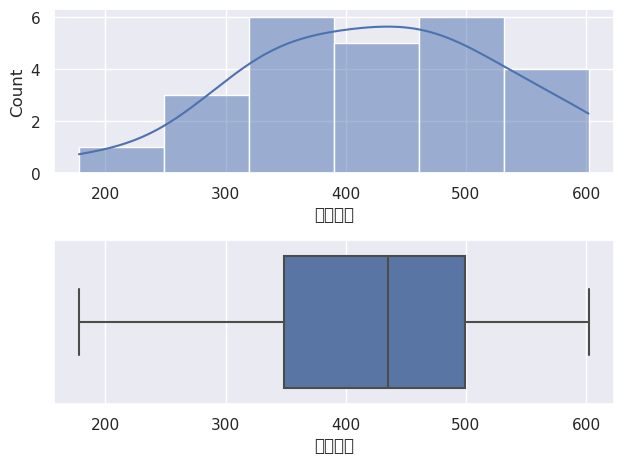

In [18]:
plt.subplot(2,1,1)
sns.histplot(x=a['정류장수'],kde=True)
# plt.xlabel("bus stop")
plt.subplot(2,1,2)
sns.boxplot(x=a["정류장수"])
# plt.xlabel("bus stop")
plt.tight_layout()
# plt.grid()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7108\449927588.py:8: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_7108\449927588.py:8: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_7108\449927588.py:8: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_7108\449927588.py:8: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_7108\449927588.py:8: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canva

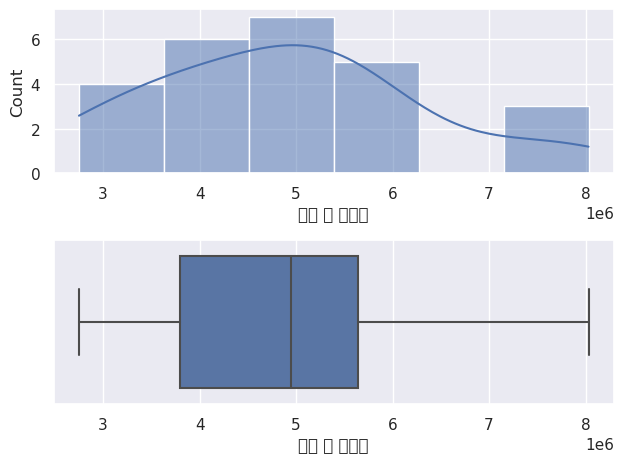

In [19]:
plt.subplot(2,1,1)
sns.histplot(x=a['승차 총 승객수'],kde=True)
# plt.xlabel("people")
# plt.grid()
plt.subplot(2,1,2)
sns.boxplot(x=a["승차 총 승객수"])
# plt.xlabel("people")
plt.tight_layout()
# plt.grid()
plt.show()

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [25]:
import scipy.stats as spst

print(spst.pearsonr(a["정류장수"],a["승차 총 승객수"]))

PearsonRResult(statistic=0.5666813370974585, pvalue=0.003141977397117322)


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


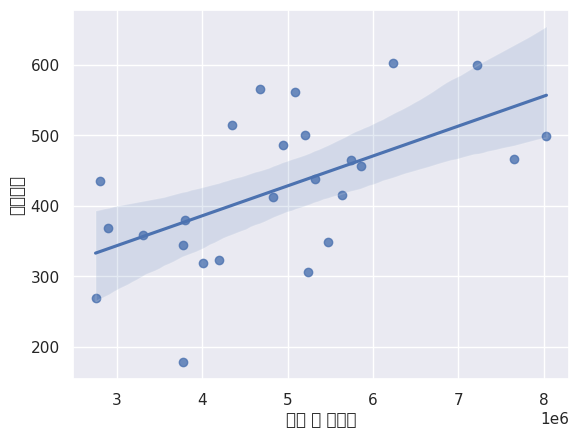

In [21]:
sns.regplot(x='승차 총 승객수', y='정류장수', data = a)
# plt.xlabel("people")
# plt.ylabel("bus stop")
plt.show()

In [22]:
b=a.iloc[0:,3:15]
b.shape

(25, 12)

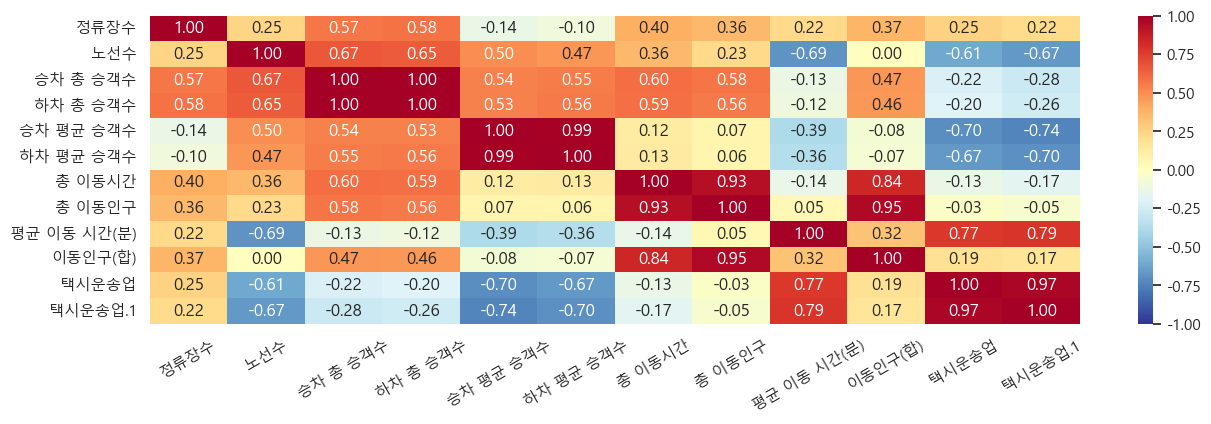

In [23]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize = (15, 4))
sns.heatmap(b.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.xticks(rotation=30)
plt.show()

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [2]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

# spst.pearsonr(X,Y)

In [1]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
# plt.figure(figsize=(20,4))
# sns.heatmap(a.corr(), annot = True)
# plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

In [58]:
a['비율1']=a["정류장수"]/a["승차 총 승객수"]
a.sort_values(by="비율1")
##정류장/'승차 총 승객수'의 비율이 적은곳이 버스 정류장이 필요한 곳

,출발 시군구 코드,도착 시군구 코드,자치구,정류장수,노선수,승차 총 승객수,하차 총 승객수,승차 평균 승객수,하차 평균 승객수,총 이동시간,...,한국인 총 인구,등록외국인 총 인구,세대당인구,65세이상고령자,구 면적,총 이동시간_출발,총 이동인구_출발,평균 이동 시간(분)_출발,이동인구(합)_출발,비율1
1,11020,11020,중구,178,110,3776675,3598932,121.020124,115.324511,10285410,...,122173,9277,1.92,24742,10,11181870,20296645.78,21.893597,39.739917,0.000047
5,11060,11060,동대문구,306,77,5240565,5115379,131.841430,128.692017,9998260,...,337982,14610,1.99,62963,14,9970040,16973103.47,21.939757,37.350479,0.000058
20,11210,11210,관악구,466,92,7655819,7792476,154.753674,157.516040,10091730,...,486375,13961,1.74,80686,30,9814740,19706689.55,23.484397,47.153538,0.000061
22,11230,11230,강남구,499,96,8030483,7569213,128.767927,121.371512,12904380,...,532577,4761,2.27,79575,39,13568850,46220924.63,23.655019,80.578446,0.000062
0,11010,11010,종로구,349,114,5468935,5205394,131.889620,125.534028,10239340,...,144275,9409,1.96,28064,24,10995240,19862431.70,22.036271,39.807584,0.000064
23,11240,11240,송파구,415,59,5641742,5603488,114.270072,113.495260,11978610,...,662607,5654,2.32,99854,34,11927950,36207933.02,25.436526,77.213940,0.000074
2,11030,11030,용산구,323,72,4189977,4086474,137.891694,134.485421,9488120,...,222169,14349,2.00,39461,22,9917590,15148400.31,22.051094,33.681449,0.000077
12,11130,11130,서대문구,456,114,5863499,5796960,109.914502,108.667192,9470030,...,305866,11209,2.11,55012,18,9602500,16952589.75,22.486237,39.697990,0.000078
14,11150,11150,양천구,319,60,4009172,3851173,97.627526,93.780086,8445360,...,446182,3196,2.45,69953,17,8191370,15668364.41,23.139855,44.261667,0.000080
18,11190,11190,영등포구,465,107,5739875,5783211,120.337855,121.246404,10842320,...,376740,23501,2.00,63547,25,11097330,25835980.43,22.169431,51.613225,0.000081


In [16]:
# a['비율2']=a["노선수"]/a["승차 총 승객수"]
# a.sort_values(by="비율2")
#강동구, 송파구, 강서구, 강남구

In [18]:
# a['비율3']=a["정류장수"]/a["하차 총 승객수"]
# a.sort_values(by="비율3")
#중구, 관악구, 동대문구, 강남구

In [20]:
# a['비율4']=a["노선수"]/a["하차 총 승객수"]
# a.sort_values(by="비율4")
#강동구, 송파구, 강서구, 관악구

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

중구, 동대문구, 관악구, 강남구

In [54]:
a.to_csv("결과.csv", index = False)

In [1]:
import sys
a = sys.stdin.readline().rstrip()

In [73]:
print(a)

In [4]:
a = int(input())
count=0
b=list(map(int, input().split()))
for i in b:
    if i<160:
        print("I",i)
        break
    else:
        count+=1
        continue
if count==len(b):
    print("P")

3
180 180 180
P
